<a href="https://colab.research.google.com/github/kemontz/Kecerdasan-Buatan/blob/main/Kecerdsan_Buatan_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-2 Supervised Learning - Regression

Sebelum mulai:
*   silahkan "Save a Copy in Drive" dahulu
* ganti file colab dengan menambahkan NAMA di depan nama file
* kerjakan latihan paling bawah dan


# Import Library

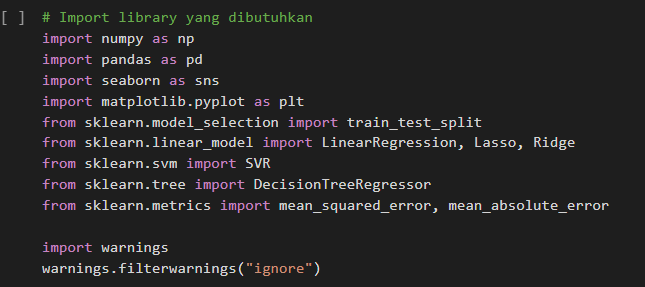

In [65]:
# Tulis di sini
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Load Dataset
https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/kc_house_3_features.csv

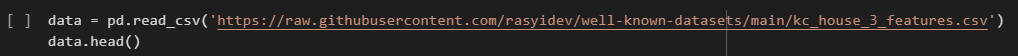

In [66]:
# Tulis di sini

data = pd.read_csv("https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/kc_house_3_features.csv")
data.head()

,sqft_living,sqft_living15,sqft_above,price
0,1180,1340,1180,221900.0
1,2570,1690,2170,538000.0
2,770,2720,770,180000.0
3,1960,1360,1050,604000.0
4,1680,1800,1680,510000.0


Dataset memiliki 3 feature:
- sqft_living
- sqft_living15
- sqft_above

dan sebuah label, yakni price.

# 1. Analisis Korelasi

Lakukan analisis korelasi terhadap dataset.

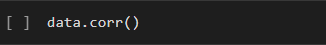

In [67]:
# Tulis di sini
data.corr()

,sqft_living,sqft_living15,sqft_above,price
sqft_living,1.000000,0.774798,0.837615,0.650602
sqft_living15,0.774798,1.000000,0.755848,0.648145
sqft_above,0.837615,0.755848,1.000000,0.515989
price,0.650602,0.648145,0.515989,1.000000


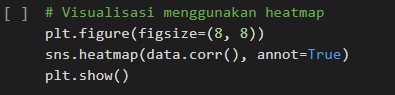

<Axes: >

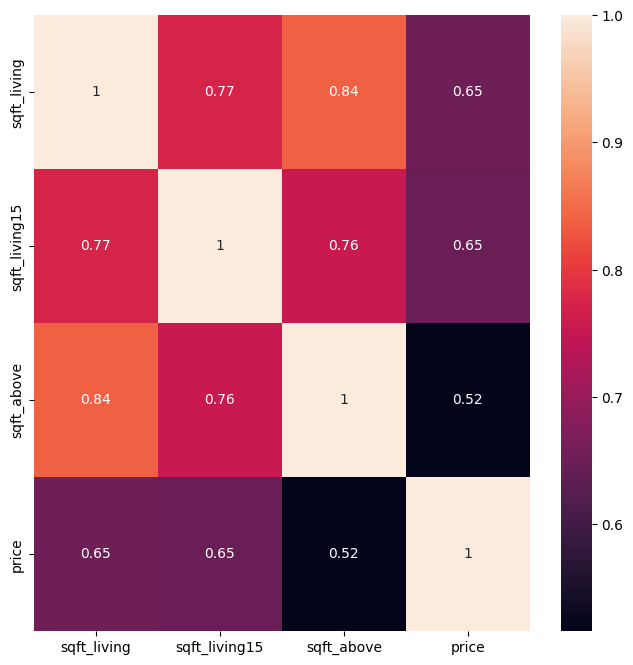

In [68]:
# Tulis di sini
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True)

Hasil analisis korelasi menunjukkan bahwa:
- semua feature berkorelasi positif terhadap price
- feature sqft_living dan sqft_living15 memiliki koefisien korelasi tertinggi

# Split Dataset

Split dataset menjadi:
- training data (X_train dan y_train) 80%
- testing data (X_test dan y_test) 20%

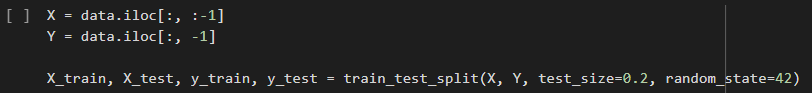

In [69]:
# Tulis di sini
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

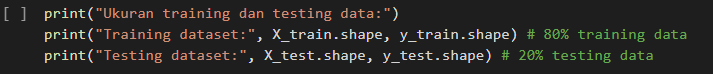

In [70]:
# Tulis di sini
print("Ukuran training dan testing data:")
print("Training dataset:", X_train.shape, y_train.shape)
print("Testing dataset", X_test.shape, y_test.shape)

Ukuran training dan testing data:
Training dataset: (80, 3) (80,)
Testing dataset (20, 3) (20,)


# 2. Modeling

Pada program ini, kita akan melatih lebih dari satu model regresi, antara lain:
- Regresi Linier
- Regresi Lasso
- Regresi Ridge
- Support Vector Regressor (SVR)
- Decision Tree Regressor (DTR)

Latih semua model menggunakan training data (X_train dan y_train)


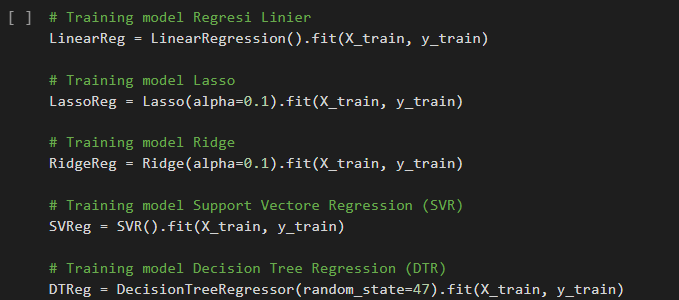

In [71]:
# Tulis di sini
LinearReg = LinearRegression().fit(X_train, y_train)
LassoReg = Lasso(alpha=0.1).fit(X_train, y_train)
RidgeReg = Ridge(alpha=0.1).fit(X_train, y_train)
SVReg = SVR().fit(X_train, y_train)
DTReg = DecisionTreeRegressor(random_state=47).fit(X_train, y_train) # Changed X_test to X_train

**alpha=0.1** dan **random_state=47** disebut sebagai hyperparameter.

Umumnya, setiap algoritma AI memiliki hyperparameter yang bisa kita setel (tuning) sesuai keinginan.

Setelan hyperparameter yang tepat mampu meningkatkan performa model.

Kunjungi dokumentasi library untuk mempelajari tentang hyperparameter:
- [Regresi Linier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Regresi Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
- [Regresi Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
- [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
- [DTR](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

# 3. Evaluasi Model Menggunakan Metric MSE dan R2

Lakukan evaluasi pada semua model yang telah dilatih. Sebelum itu, kita perlu men-generate hasil prediksi tiap model.

Generate:
- hasil prediksi training data (y pred train)
- hasil prediksi testing data (y pred test)

menggunakan model.

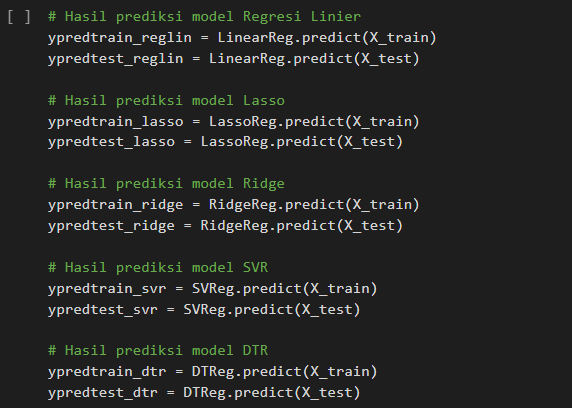

In [72]:
# Tulis di sini
ypredtrain_reglin = LinearReg.predict(X_train)
ypredtest_reglin = LinearReg.predict(X_test)

ypredtrain_lasso = LassoReg.predict(X_train)
ypredtest_lasso = LassoReg.predict(X_test)

ypredtrain_ridge = RidgeReg.predict(X_train)
ypredtest_ridge = RidgeReg.predict(X_test)

ypredtrain_svr = SVReg.predict(X_train)
ypredtest_svr = SVReg.predict(X_test)

ypredtrain_dtr = DTReg.predict(X_train)
ypredtest_dtr = DTReg.predict(X_test)

Evaluasi pertama dilakukan menggunakan metric MSE.

Bandingkan:
- label training data (y_train) dengan hasil prediksi training data (y pred train)
- label testing data (y_test) dengan hasil prediksi testing data (y pred test)

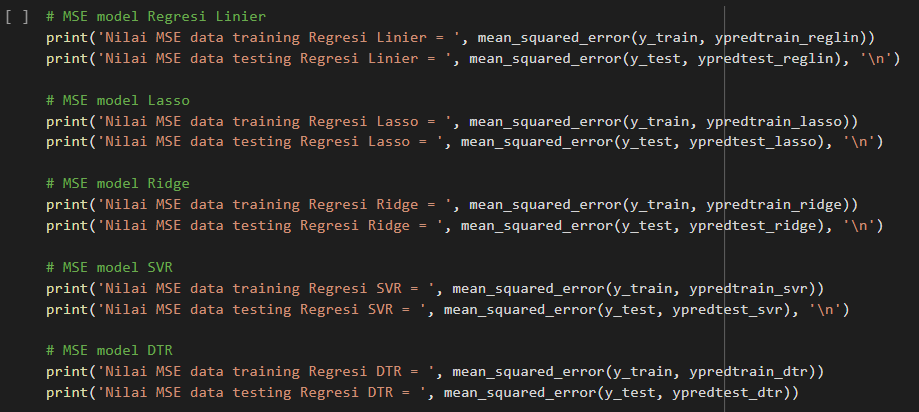

In [73]:
# Tulis di sini
# MSE model Regresi Linier
print('Nilai MSE data training Regresi Linier = ', mean_squared_error(y_train, ypredtrain_reglin))
print('Nilai MSE data testing Regresi Linier = ', mean_squared_error(y_test, ypredtest_reglin), '\n')

# MSE model Lasso
print('Nilai MSE data training Regresi Lasso = ', mean_squared_error(y_train, ypredtrain_lasso))
print('Nilai MSE data testing Regresi Lasso = ', mean_squared_error(y_test, ypredtest_lasso), '\n')

# MSE model Ridge
print('Nilai MSE data training Regresi Ridge = ', mean_squared_error(y_train, ypredtrain_ridge))
print('Nilai MSE data testing Regresi Ridge = ', mean_squared_error(y_test, ypredtest_ridge), '\n')

# MSE model SVR
print('Nilai MSE data training Regresi SVR = ', mean_squared_error(y_train, ypredtrain_svr))
print('Nilai MSE data testing Regresi SVR = ', mean_squared_error(y_test, ypredtest_svr), '\n')

# MSE model DTR
print('Nilai MSE data training Regresi DTR = ', mean_squared_error(y_train, ypredtrain_dtr))
print('Nilai MSE data testing Regresi DTR = ', mean_squared_error(y_test, ypredtest_dtr))


Nilai MSE data training Regresi Linier =  51040616225.03679
Nilai MSE data testing Regresi Linier =  32881775262.15838 

Nilai MSE data training Regresi Lasso =  51040616225.03679
Nilai MSE data testing Regresi Lasso =  32881775271.07427 

Nilai MSE data training Regresi Ridge =  51040616225.0368
Nilai MSE data testing Regresi Ridge =  32881775254.902454 

Nilai MSE data training Regresi SVR =  113673471256.08711
Nilai MSE data testing Regresi SVR =  37393496977.231895 

Nilai MSE data training Regresi DTR =  455625000.0
Nilai MSE data testing Regresi DTR =  40958648000.0


Hasil evaluasi MSE menunjukkan bahwa:


Model | MSE traing data | MSE testing data | Keputusan
---|---|---|---|
Regresi Linier | 51040616225.03679 | 32881775262.15838 | -
Regresi Lasso | 51040616225.0368 | 32881775271.07428 | -
Regresi Ridge | 32881775271.07428 | 32881775254.902466 | -
SVR | 113673471256.08711 | 37393496977.231895 | Overfit
DTR | 455625000.0 | 40958648000.0 | Goodfit

Model DTR merupakan model terbaik karena MSE training dan testing tidak jauh berbeda.

> **Note**: Regresi Linier, Lasso, dan Ridge memiliki MSE training yang lebih tinggi dibanding MSE testing. Hal ini bisa terjadi karena data kita berjumlah sedikit. Salah satu solusinya adalah dengan menambah jumlah data dalam dataset.

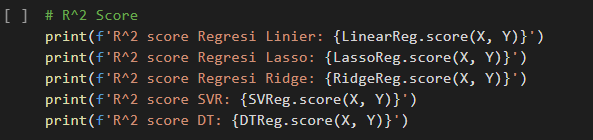

In [78]:
# Tulis di sini
print(f'R^2 score Regresi Linier: {LinearReg.score(X, Y)}')
print(f'R^2 score Regresi Lasso: {LassoReg.score(X, Y)}')
print(f'R^2 score Regresi Ridge: {RidgeReg.score(X, Y)}')
print(f'R^2 score SVR: {SVReg.score(X, Y)}')
print(f'R^2 score DTR: {DTReg.score(X, Y)}')

R^2 score Regresi Linier: 0.48353037146199596
R^2 score Regresi Lasso: 0.48353037144257016
R^2 score Regresi Ridge: 0.4835303714778053
R^2 score SVR: -0.07215508470730314
R^2 score DTR: 0.906788861012355


Pilih model dengan R^2 score mendekati 1.

Hasil evaluasi R^2 score menunjukkan bahwa DTR merupakan model terbaik.

## Visualisasi Hasil Prediksi dengan Data Sebenarnya

Visualisasikan perbandingan antara label testing data (y_test) dengan hasil prediksi testing data (y pred test) pada setiap model.

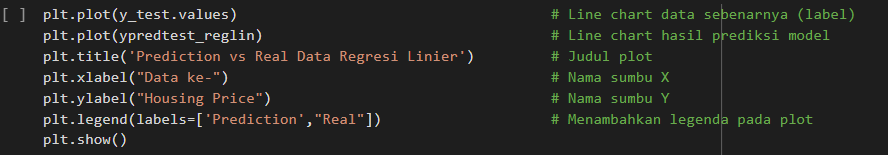

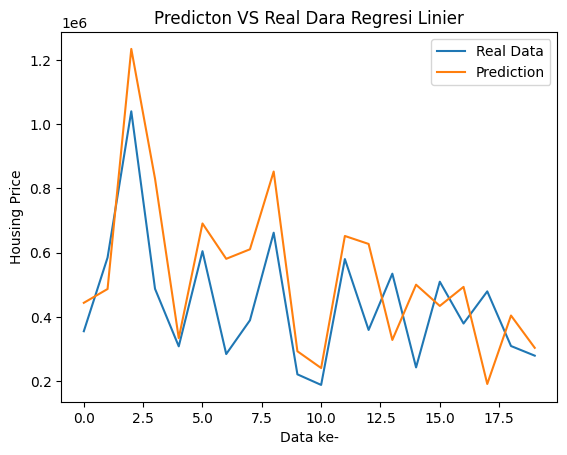

In [79]:
# Tulis di sini
plt.plot(y_test. values)
plt.plot(ypredtest_reglin)
plt.title('Predicton VS Real Dara Regresi Linier')
plt.xlabel("Data ke-")
plt.ylabel("Housing Price")
plt.legend(labels=['Real Data', 'Prediction'])
plt.show()

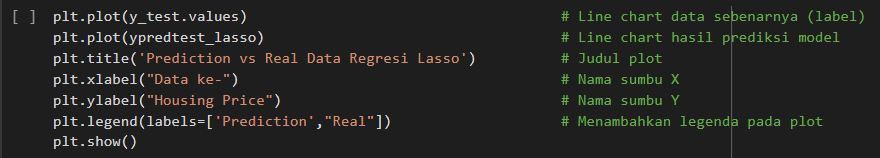

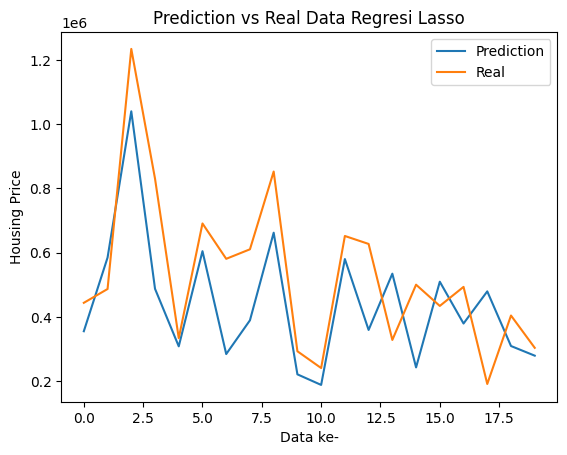

In [80]:
# Tulis di sini
plt.plot(y_test.values)
plt.plot(ypredtest_lasso)
plt.title('Prediction vs Real Data Regresi Lasso')
plt.xlabel("Data ke-")
plt.ylabel("Housing Price")
plt.legend(['Prediction', 'Real'])
plt.show()

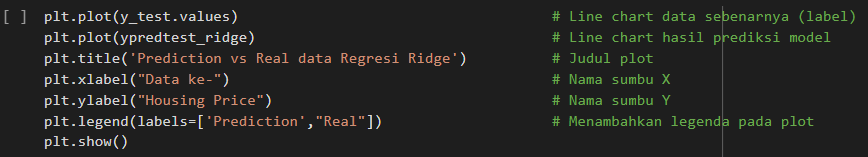

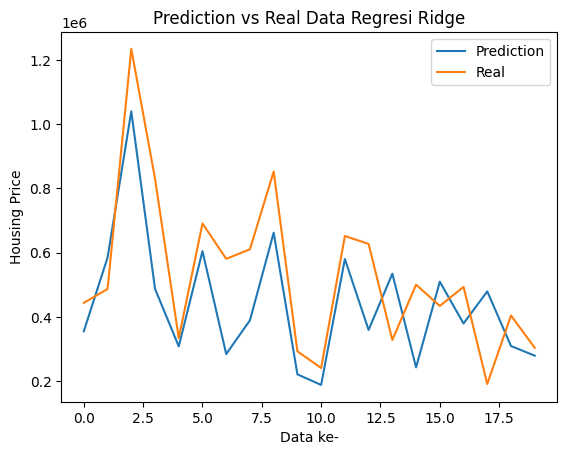

In [81]:
# Tulis di sini
plt.plot(y_test.values)
plt.plot(ypredtest_ridge)
plt.title('Prediction vs Real Data Regresi Ridge')
plt.xlabel("Data ke-")
plt.ylabel("Housing Price")
plt.legend(['Prediction', 'Real'])
plt.show()

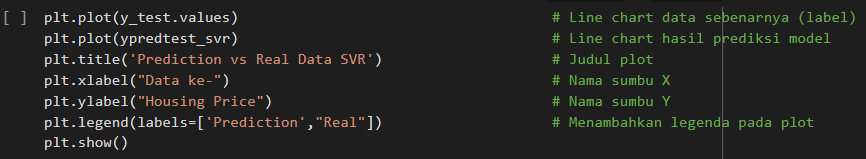

In [ ]:
# Tulis di sini
plt.plot(y_test.values)
plt.plot(ypredtest_svr)
plt.title('Prediction vs Real Data Regresi SVR')
plt.xlabel("Data ke-")
plt.ylabel("Housing Price")
plt.legend(['Prediction', 'Real'])
plt.show()

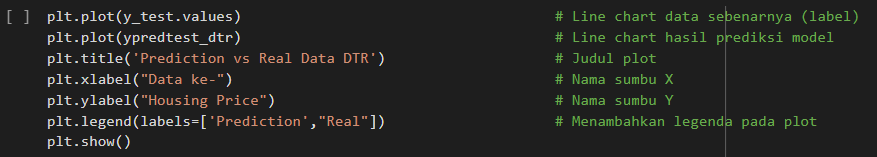

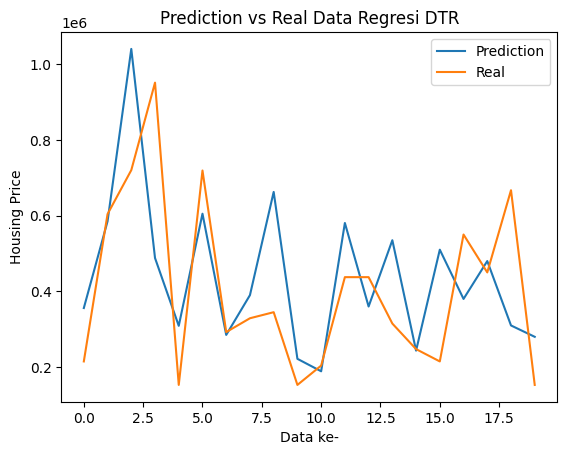

In [82]:
# Tulis di sini
plt.plot(y_test.values)
plt.plot(ypredtest_dtr)
plt.title('Prediction vs Real Data Regresi DTR')
plt.xlabel("Data ke-")
plt.ylabel("Housing Price")
plt.legend(['Prediction', 'Real'])
plt.show()


# Kesimpulan

Model DTR merupakan model terbaik berdasarkan hasil evaluasi menggunakan metrics MSE dan R^2.

Model DTR selanjutnya kita pilih untuk memprediksi data baru.

Model DTR juga sudah bisa kita deploy. Materi deployment akan disampaikan saat AI Domain.

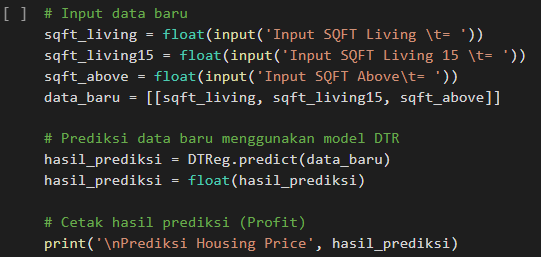

In [83]:
# Tulis di sini
sqft_living = float(input('Input SQFT Living \t= '))
sqft_living15 = float(input('Input SQFT Living 15 \t= '))
sqft_above = float(input('Input SQFT Above\t= '))
data_baru = [[sqft_living, sqft_living15, sqft_above]]

# Prediksi data baru menggunakan model DTR
hasil_prediksi = DTReg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

# Cetak hasil prediksi (Profit)
print('\nPrediksi Housing Price', hasil_prediksi)


Input SQFT Living 	= 420
Input SQFT Living 15 	= 221
Input SQFT Above	= 2432

Prediksi Housing Price 450000.0


# Exercise (Latihan)

1. Download dataset [di sini](https://drive.google.com/file/d/1ir-ilrC_m4XAny9tklloJc52oLITjUGy/view?usp=sharing).

2. Buat model regresi linier dan model regresi lainnya menggunakan dataset tersebut!
3. Evaluasi setiap model!
4. Tentukan dan jelaskan model yang paling baik!